In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib

/home/sven/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
train = pd.read_csv('../train.csv', index_col=0)
train.head()

,node_0_bytes_in_event,node_0_bytes_out_event,node_0_cpu_aidle_event,node_0_cpu_idle_event,node_0_cpu_nice_event,node_0_cpu_num_event,node_0_cpu_speed_event,node_0_cpu_system_event,node_0_cpu_user_event,node_0_cpu_wio_event,...,node_28_part_max_used_event,node_28_pkts_in_event,node_28_pkts_out_event,node_28_proc_run_event,node_28_proc_total_event,node_28_swap_free_event,node_28_swap_total_event,node_999_balance,node_999_balance-numeric,node_999_balance-standarddeviation
timestamp,,,,,,,,,,,,,,,,,,,,,
1792,156.0,419.0,0.0,99.0,0.0,4.0,2834.0,0.0,0.0,0.0,...,33.0,94.0,11.0,0.0,844.0,1012696.0,1023992.0,1.0,0.0,0.0
1793,156.0,419.0,0.0,99.0,0.0,4.0,2834.0,0.0,0.0,0.0,...,33.0,94.0,11.0,0.0,844.0,1012696.0,1023992.0,1.0,0.0,0.0
1794,156.0,419.0,0.0,99.0,0.0,4.0,2834.0,0.0,0.0,0.0,...,33.0,94.0,11.0,0.0,844.0,1012696.0,1023992.0,1.0,0.0,0.0
1795,162.0,419.0,0.0,99.0,0.0,4.0,2834.0,0.0,0.0,0.0,...,33.0,94.0,11.0,0.0,844.0,1012696.0,1023992.0,1.0,0.0,0.0
1796,163.0,419.0,0.0,99.0,0.0,4.0,2834.0,0.0,0.0,0.0,...,33.0,94.0,11.0,0.0,844.0,1012696.0,1023992.0,1.0,0.0,0.0


In [3]:
scaler = MinMaxScaler()
scaler.fit(train)
joblib.dump(scaler, '../scaler.save')

['../scaler.save']

In [4]:
train_index = train.index
X_train = scaler.transform(train)
X_train.shape

(44840, 300)

In [5]:
sess = tf.Session()
s, u, v = tf.svd(X_train)
s = s.eval(session=sess)
v = v.eval(session=sess)

In [6]:
s = s ** 2
s_cum = s.cumsum()
s_cum /= s_cum[-1]

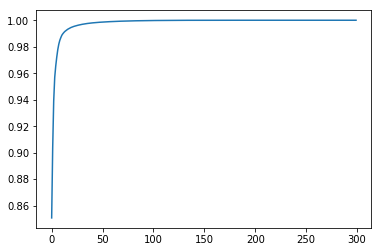

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(s_cum)
plt.show()

In [8]:
dim_r = 0
while s_cum[dim_r] < 0.99:
    dim_r += 1
dim_r += 1
dim_r

13

In [9]:
trans_matrix = v[:, :dim_r]
np.savetxt('../trans_matrix.txt', trans_matrix)
trans_matrix.shape

(300, 13)

In [10]:
X_train = X_train.dot(trans_matrix)
X_train = pd.DataFrame(X_train, index=train_index)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
timestamp,,,,,,,,,,,,,
1792,-6.310872,0.020404,-0.349056,0.016931,-0.850807,-0.151492,-0.129211,0.207992,-0.592122,-0.363225,0.065350,0.043828,0.049504
1793,-6.310877,0.020411,-0.349057,0.016927,-0.850812,-0.151485,-0.129211,0.208004,-0.592125,-0.363231,0.065354,0.043824,0.049501
1794,-6.310881,0.020417,-0.349058,0.016919,-0.850827,-0.151481,-0.129212,0.208016,-0.592127,-0.363228,0.065360,0.043820,0.049499
1795,-6.310887,0.020418,-0.349062,0.016921,-0.850842,-0.151470,-0.129214,0.208032,-0.592128,-0.363229,0.065365,0.043819,0.049497
1796,-6.310892,0.020415,-0.349073,0.016933,-0.850863,-0.151451,-0.129212,0.208053,-0.592124,-0.363237,0.065367,0.043820,0.049492


In [11]:
scaler2 = MinMaxScaler()
scaler2.fit(X_train)
X_train = scaler2.transform(X_train)
joblib.dump(scaler2, '../scaler2.save')

['../scaler2.save']

In [12]:
X_train = pd.DataFrame(X_train, index=train_index)
X_train.to_csv('../train_treated.csv')
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
timestamp,,,,,,,,,,,,,
1792,0.100794,0.613865,0.306122,0.758122,0.211457,0.383166,0.553785,0.634854,0.340455,0.482026,0.663053,0.631823,0.561708
1793,0.100793,0.613866,0.306122,0.758121,0.211455,0.383168,0.553785,0.634858,0.340454,0.482024,0.663054,0.631822,0.561707
1794,0.100792,0.613867,0.306122,0.758119,0.211449,0.383169,0.553785,0.634861,0.340453,0.482025,0.663055,0.631821,0.561706
1795,0.100790,0.613867,0.306121,0.758120,0.211443,0.383172,0.553784,0.634867,0.340453,0.482024,0.663056,0.631821,0.561706
1796,0.100789,0.613867,0.306120,0.758122,0.211435,0.383177,0.553785,0.634874,0.340455,0.482022,0.663056,0.631821,0.561704


In [13]:
val1 = pd.read_csv('../val1.csv', index_col=0)
val1_index = val1.index
val1 = scaler.transform(val1)
val1 = val1.dot(trans_matrix)
val1 = scaler2.transform(val1)
val1 = pd.DataFrame(val1, index=val1_index)
val1.to_csv('../val1_treated.csv')
val1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
timestamp,,,,,,,,,,,,,
0,0.109457,0.623913,0.314422,0.743914,0.263824,0.364369,0.550149,0.609153,0.334688,0.485609,0.660218,0.630390,0.567227
1,0.109455,0.623913,0.314421,0.743914,0.263809,0.364375,0.550149,0.609164,0.334687,0.485608,0.660218,0.630390,0.567227
2,0.109452,0.623912,0.314420,0.743916,0.263793,0.364380,0.550148,0.609171,0.334685,0.485605,0.660217,0.630392,0.567225
3,0.109449,0.623910,0.314418,0.743920,0.263773,0.364390,0.550149,0.609186,0.334690,0.485600,0.660218,0.630392,0.567221
4,0.109487,0.624059,0.314166,0.743968,0.263914,0.363941,0.550498,0.609564,0.334591,0.486072,0.659972,0.631308,0.567677


In [14]:
val2 = pd.read_csv('../val2.csv', index_col=0)
val2_index = val2.index
val2 = scaler.transform(val2)
val2 = val2.dot(trans_matrix)
val2 = scaler2.transform(val2)
val2 = pd.DataFrame(val2, index=val2_index)
val2.to_csv('../val2_treated.csv')
val2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
timestamp,,,,,,,,,,,,,
8962,0.130021,0.589997,0.304973,0.838416,0.403641,0.419439,0.601607,0.545527,0.487815,0.724279,0.672797,0.634193,0.533608
8963,0.129966,0.589814,0.305137,0.838448,0.403450,0.419782,0.601393,0.545213,0.488011,0.724019,0.672808,0.633729,0.533778
8964,0.129963,0.589814,0.305134,0.838450,0.403424,0.419791,0.601393,0.545229,0.488015,0.724016,0.672809,0.633728,0.533776
8965,0.129959,0.589813,0.305132,0.838454,0.403402,0.419799,0.601392,0.545242,0.488018,0.724012,0.672809,0.633730,0.533776
8966,0.129948,0.589806,0.304899,0.838593,0.403222,0.419529,0.601712,0.545376,0.488322,0.724408,0.672715,0.634129,0.533643


In [15]:
testn = pd.read_csv('../testn.csv', index_col=0)
testn_index = testn.index
testn = scaler.transform(testn)
testn = testn.dot(trans_matrix)
testn = scaler2.transform(testn)
testn = pd.DataFrame(testn, index=testn_index)
testn.to_csv('../testn_treated.csv')
testn.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
timestamp,,,,,,,,,,,,,
10754,0.107177,0.514788,0.279675,0.902445,0.355943,0.438682,0.632729,0.504520,0.476381,0.724936,0.673077,0.632690,0.523748
10755,0.107221,0.514950,0.279410,0.902476,0.356041,0.438248,0.633108,0.504798,0.476396,0.725172,0.673024,0.633342,0.523527
10756,0.107262,0.515112,0.279143,0.902511,0.356128,0.437823,0.633488,0.505086,0.476419,0.725407,0.672970,0.633994,0.523302
10757,0.107312,0.515265,0.278885,0.902556,0.356270,0.437337,0.633820,0.505521,0.476368,0.725896,0.672752,0.635036,0.523814
10758,0.107308,0.515264,0.278882,0.902562,0.356248,0.437350,0.633823,0.505541,0.476370,0.725887,0.672754,0.635036,0.523815


In [16]:
vala = pd.read_csv('../vala.csv', index_col=0)
vala_index = vala.index
vala = scaler.transform(vala)
vala = vala.dot(trans_matrix)
vala = scaler2.transform(vala)
vala = pd.DataFrame(vala, index=vala_index)
vala.to_csv('../vala_treated.csv')
vala.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
timestamp,,,,,,,,,,,,,
11950,0.304360,0.451546,0.370109,0.823414,0.376383,0.268269,0.573045,0.335758,0.284546,0.707485,0.633139,0.604642,0.728759
11951,0.351364,0.420879,0.439867,0.792905,0.381250,0.302732,0.548924,0.421014,0.300822,0.677230,0.620443,0.462471,0.673112
11952,0.405559,0.399671,0.482185,0.787015,0.382249,0.315909,0.533287,0.472198,0.301471,0.676782,0.621474,0.399723,0.710162
11953,0.454917,0.373930,0.515419,0.788599,0.377671,0.335891,0.523789,0.505231,0.283663,0.661471,0.620616,0.332469,0.753160
11954,0.484435,0.355778,0.537807,0.790311,0.372785,0.350664,0.515573,0.521615,0.278161,0.653532,0.622117,0.299475,0.786797


In [17]:
testa = pd.read_csv('../testa.csv', index_col=0)
testa_index = testa.index
testa = scaler.transform(testa)
testa = testa.dot(trans_matrix)
testa = scaler2.transform(testa)
testa = pd.DataFrame(testa, index=testa_index)
testa.to_csv('../testa_treated.csv')
testa.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
timestamp,,,,,,,,,,,,,
12008,0.516522,0.257255,0.635075,0.750115,0.381252,0.379085,0.533521,0.588727,0.478531,0.537075,0.689236,0.483854,0.715458
12009,0.509757,0.256852,0.621113,0.750047,0.380962,0.357106,0.558081,0.586001,0.473990,0.551519,0.691572,0.514893,0.724240
12010,0.510922,0.251290,0.613669,0.749075,0.378775,0.334778,0.583877,0.590710,0.470303,0.561605,0.691223,0.531216,0.737908
12011,0.520676,0.234345,0.621164,0.737014,0.385145,0.304763,0.628540,0.646046,0.491010,0.559905,0.680336,0.547661,0.713700
12012,0.523854,0.227991,0.622493,0.730792,0.391141,0.287987,0.652674,0.675515,0.497921,0.565603,0.672773,0.558849,0.706712
